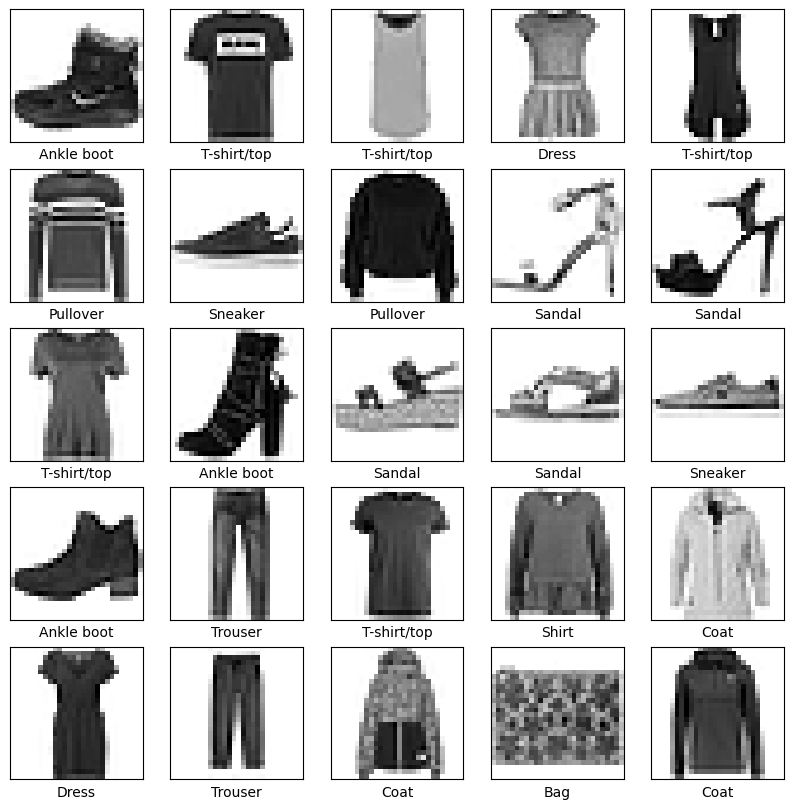

train loss:2.2998518428559436
=== epoch:1, train acc:0.181, test acc:0.152 ===
train loss:2.297551876179239
train loss:2.2929768235196506
train loss:2.2884408226417285
train loss:2.275215712462818
train loss:2.2569247190301684
train loss:2.233156484294833
train loss:2.215843973083425
train loss:2.1764988486145715
train loss:2.1500010694100684
train loss:2.0773468120443663
train loss:2.055485418241221
train loss:1.9793107120333937
train loss:1.9123617103920099
train loss:1.8510143254556521
train loss:1.7554347585190524
train loss:1.6823431735584211
train loss:1.6057139363832709
train loss:1.4965268721232121
train loss:1.488609878759747
train loss:1.4063451366385598
train loss:1.2830200757385368
train loss:1.2336445032710828
train loss:1.2421096401876393
train loss:1.3067895182945457
train loss:1.0580053328922379
train loss:1.1439869828955276
train loss:1.011524912024567
train loss:1.0292399868515263
train loss:1.0653324785252059
train loss:0.981305338542025
train loss:1.0972940425342401

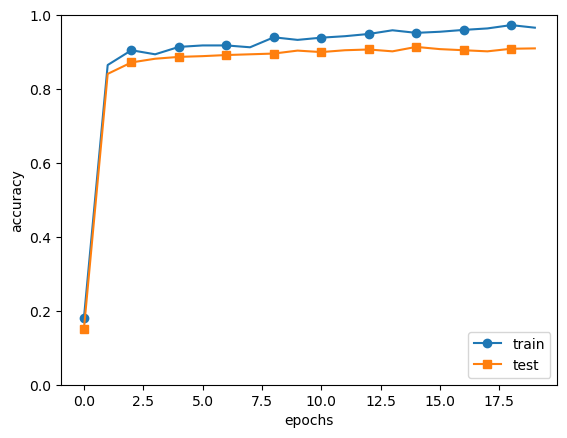

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import gzip

base_path = './data/fashion-mnist'
train_images_path = os.path.join(base_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(base_path, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(base_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(base_path, 't10k-labels-idx1-ubyte.gz')

# Fashion MNIST 데이터셋 로드 
def load_fashion_mnist_from_gzip(images_path, labels_path):
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), np.uint8, offset=8)
    
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(len(labels), 1, 28, 28)
    
    return images, labels

x_train, t_train = load_fashion_mnist_from_gzip(train_images_path, train_labels_path)
x_test, t_test = load_fashion_mnist_from_gzip(test_images_path, test_labels_path)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 몇몇 샘플 이미지를 시각화하여 Fashion MNIST 데이터셋을 사용하고 있음을 증명
def plot_sample_images(x, y, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(class_names[y[i]])
    plt.show()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plot_sample_images(x_train, t_train, class_names)

max_epochs = 20

network = SimpleConvNet(input_dim=(1, 28, 28),
                        conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)

trainer.train()

network.save_params("params.pkl")
print("Saved Network Parameters!")

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
